In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 


In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"


In [3]:
titanic = pd.read_csv(url)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']


## Data cleaning and preprocessing

In [6]:
#REmoving unneccesory features
titanic_modi1 = titanic.drop(["PassengerId","Name","Ticket"],axis=1)

In [7]:
titanic_modi1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,E mbarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


#### Lets extract features one by one and clean them accordingly

#### 1. start with the cabin columns

In [8]:
titanic_modi1["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
###Extract first later from cabin columns which may indicates that richer people survived and not reacher may not 
###Before doing that necesory to look into nan values

In [10]:
print("Null inside cabin columns is {} % ".format(titanic_modi1["Cabin"].isnull().sum() * 100 /titanic_modi1.shape[0]))
print("It is better practise to drop cabin columns")

Null inside cabin columns is 77.10437710437711 % 
It is better practise to drop cabin columns


In [11]:
titanic_modi1["Cabin"] = titanic_modi1["Cabin"].astype(str).apply(lambda x : x[0])

In [12]:
titanic_modi2 = titanic_modi1.drop("Cabin", axis = 1)

In [13]:
titanic_modi2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,E mbarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### 2. Check nan values presents

In [14]:
titanic_modi2.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Fare           0
E mbarked      2
dtype: int64

#### 3. Replace Age nan with its median values

In [15]:
titanic_modi2["Age"] = np.where(titanic_modi2["Age"].isnull() == True , titanic_modi2["Age"].median() , titanic_modi2["Age"])

In [16]:
titanic_modi2.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
E mbarked    2
dtype: int64

In [17]:
titanic_modi2.dropna(inplace = True)

In [18]:
titanic_modi2.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
E mbarked    0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

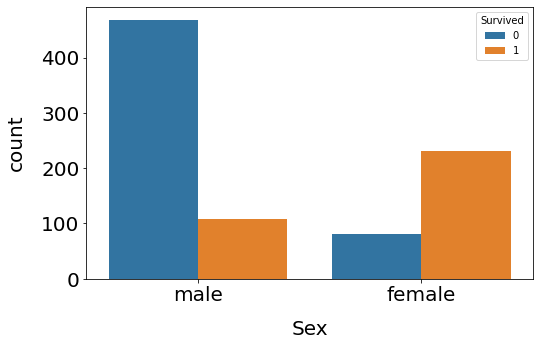

In [19]:
plt.figure(figsize = (8,5))
plt.xlabel("Sex" , fontsize = 20 , labelpad = 15)
plt.ylabel("Count" , fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

sns.countplot( x= "Sex" , data = titanic_modi2 , hue = "Survived")

#### 4. Dealing with dummy variables

In [20]:
titanic_modi2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'E mbarked'],
      dtype='object')

In [21]:
titanic_modi2["E mbarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
titanic_modi3 = titanic_modi2.join(pd.get_dummies(titanic_modi2["E mbarked"], drop_first=True), how = "left" ).drop("E mbarked" , axis = 1)

In [23]:
titanic_modi3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,male,22.0,1,0,7.2500,0,1
1,1,1,female,38.0,1,0,71.2833,0,0
2,1,3,female,26.0,0,0,7.9250,0,1
3,1,1,female,35.0,1,0,53.1000,0,1
4,0,3,male,35.0,0,0,8.0500,0,1


#### Converting sex columns into numerical data by map function

In [24]:
titanic_modi3["Sex"] = titanic_modi3["Sex"].map({"male" : 0 , "female" : 1})

In [25]:
titanic_modi3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,1
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,28.0,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,0,0


### Spliting dataset into training and testing 

In [36]:
from sklearn.model_selection import train_test_split , GridSearchCV

In [30]:
train , test = train_test_split(titanic_modi3, test_size = 0.3 , random_state = 42 )

In [31]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
486,1,1,1,35.0,1,0,90.0000,0,1
293,0,3,1,24.0,0,0,8.8500,0,1
173,0,3,0,21.0,0,0,7.9250,0,1
450,0,2,0,36.0,1,2,27.7500,0,1
361,0,2,0,29.0,1,0,27.7208,0,0


In [32]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
281,0,3,0,28.0,0,0,7.8542,0,1
435,1,1,1,14.0,1,2,120.0000,0,1
39,1,3,1,14.0,1,0,11.2417,0,0
418,0,2,0,30.0,0,0,13.0000,0,1
585,1,1,1,18.0,0,2,79.6500,0,1


In [33]:
x_train = train.drop("Survived" , axis = 1)
y_train = train.Survived
x_test = test.drop("Survived" , axis = 1)
y_test = test.Survived


#### Standerdise dataset

In [34]:
from sklearn.preprocessing import StandardScaler

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Tuning and fitting the models

In [37]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [40]:
clf = DecisionTreeClassifier()

In [41]:
#This operation is simmiloar to tuning lassocv , ridgecv etc
#cv = 5 means it devide data into 5 chunk and ietrate each chunk for given max iteration
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [42]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [43]:
#Tuned parameter are shown below for given probelm
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}


In [44]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =17, min_samples_leaf= 4, min_samples_split= 5, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

## Evaluation of models

In [45]:
clf.score(x_train,y_train)

0.8633440514469454

In [46]:
clf.score(x_test,y_test)

0.8277153558052435

####  Confusion Matrix

In [55]:
from sklearn.metrics import classification_report, confusion_matrix , recall_score , f1_score , precision_score

In [56]:
confusion_matrix(y_test , clf.predict(x_test))

array([[152,  15],
       [ 31,  69]], dtype=int64)

In [57]:
recall_score(y_test , clf.predict(x_test))

0.69

In [58]:
precision_score(y_test , clf.predict(x_test))

0.8214285714285714

In [59]:
f1_score(y_test , clf.predict(x_test))

0.75